# Projeto 9: Classificação de objetos (CIFAR-10)

Arquitetura LeNet: http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

# Seção 1: Importação das Bibliotecas

In [190]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import zipfile
tf.__version__

'2.12.0'

# Seção 2: Carregamento da Base de Dados

In [191]:
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [192]:
print("Treinamento:", x_train.shape, y_train.shape)
print("Teste:      ", x_test.shape, y_test.shape)

Treinamento: (50000, 32, 32, 3) (50000, 1)
Teste:       (10000, 32, 32, 3) (10000, 1)


# Etapa 3: Visualização dos Dados

[3]


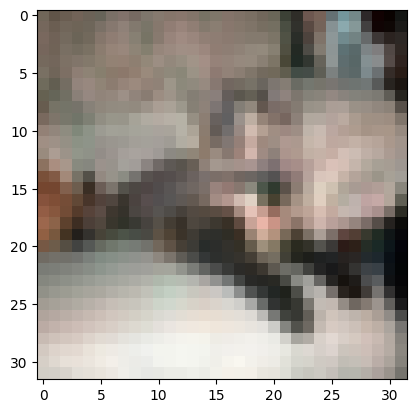

In [193]:
i = 3100
plt.imshow(x_train[i])
print(y_train[i])

# Etapa 4: Adequação dos dados

In [194]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [195]:
y_train = tf.keras.utils.to_categorical(y_train, 10)

In [196]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [197]:
x_train = np.array(x_train, dtype="float32")

In [198]:
print("MIN:", np.min(x_train))
print("MAX:", np.max(x_train))

MIN: 0.0
MAX: 255.0


In [199]:
x_train = x_train / 255

In [200]:
print("MIN:", np.min(x_train))
print("MAX:", np.max(x_train))

MIN: 0.0
MAX: 1.0


# Etapa 5: Criação do modelo e treinamento

In [201]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import models

cnn = models.Sequential()

# STEP 1
cnn.add(Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)))
cnn.add(Conv2D(32, (3,3), activation="relu"))
cnn.add(Dropout(0.3))
cnn.add(MaxPooling2D())

# STEP 2
cnn.add(Conv2D(64, (3,3), activation="relu", input_shape=(32,32,3)))
cnn.add(Conv2D(64, (3,3), activation="relu"))
cnn.add(Dropout(0.3))
cnn.add(MaxPooling2D())

# STEP 3
cnn.add(Flatten())

# STEP 4
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(1024, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 conv2d_22 (Conv2D)          (None, 10, 10, 64)        36928     
                                                      

In [203]:
cnn.compile(
    optimizer=tf.keras.optimizers.RMSprop(0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
  )

In [204]:
history = cnn.fit(
    x_train,
    y_train,
    batch_size=500,
    epochs=100,
  )

Epoch 1/100
100/100 [==============================] - 6s 33ms/step - loss: 2.0564 - accuracy: 0.2440
Epoch 2/100
100/100 [==============================] - 3s 34ms/step - loss: 1.8161 - accuracy: 0.3470
Epoch 3/100
100/100 [==============================] - 4s 35ms/step - loss: 1.7110 - accuracy: 0.3866
Epoch 4/100
100/100 [==============================] - 3s 33ms/step - loss: 1.6324 - accuracy: 0.4142
Epoch 5/100
100/100 [==============================] - 3s 34ms/step - loss: 1.5706 - accuracy: 0.4360
Epoch 6/100
100/100 [==============================] - 3s 35ms/step - loss: 1.5183 - accuracy: 0.4568
Epoch 7/100
100/100 [==============================] - 3s 33ms/step - loss: 1.4710 - accuracy: 0.4727
Epoch 8/100
100/100 [==============================] - 3s 34ms/step - loss: 1.4302 - accuracy: 0.4925
Epoch 9/100
100/100 [==============================] - 3s 34ms/step - loss: 1.3928 - accuracy: 0.5042
Epoch 10/100
100/100 [==============================] - 3s 34ms/step - loss: 1.357

# Etapa 6: Avaliação do modelo

In [207]:
x_test.shape

(10000, 32, 32, 3)

In [214]:
y_test.shape

(10000, 1)

0

In [229]:
score = cnn.evaluate(x_test, tf.keras.utils.to_categorical(y_test))
print('Test Accuracy: {}'.format(score[1]))

313/313 [==============================] - 2s 5ms/step - loss: 152.6714 - accuracy: 0.6723
Test Accuracy: 0.6722999811172485


In [252]:
#predicted_classes = LeNet.predict_classes(X_test_gray_norm) -- Atualizado 17/01/22
#y_true = y_test

In [222]:
predict_x = cnn.predict(x_test)
predicted_classes=np.argmax(predict_x,axis=1)
y_true = y_test

313/313 [==============================] - 1s 3ms/step


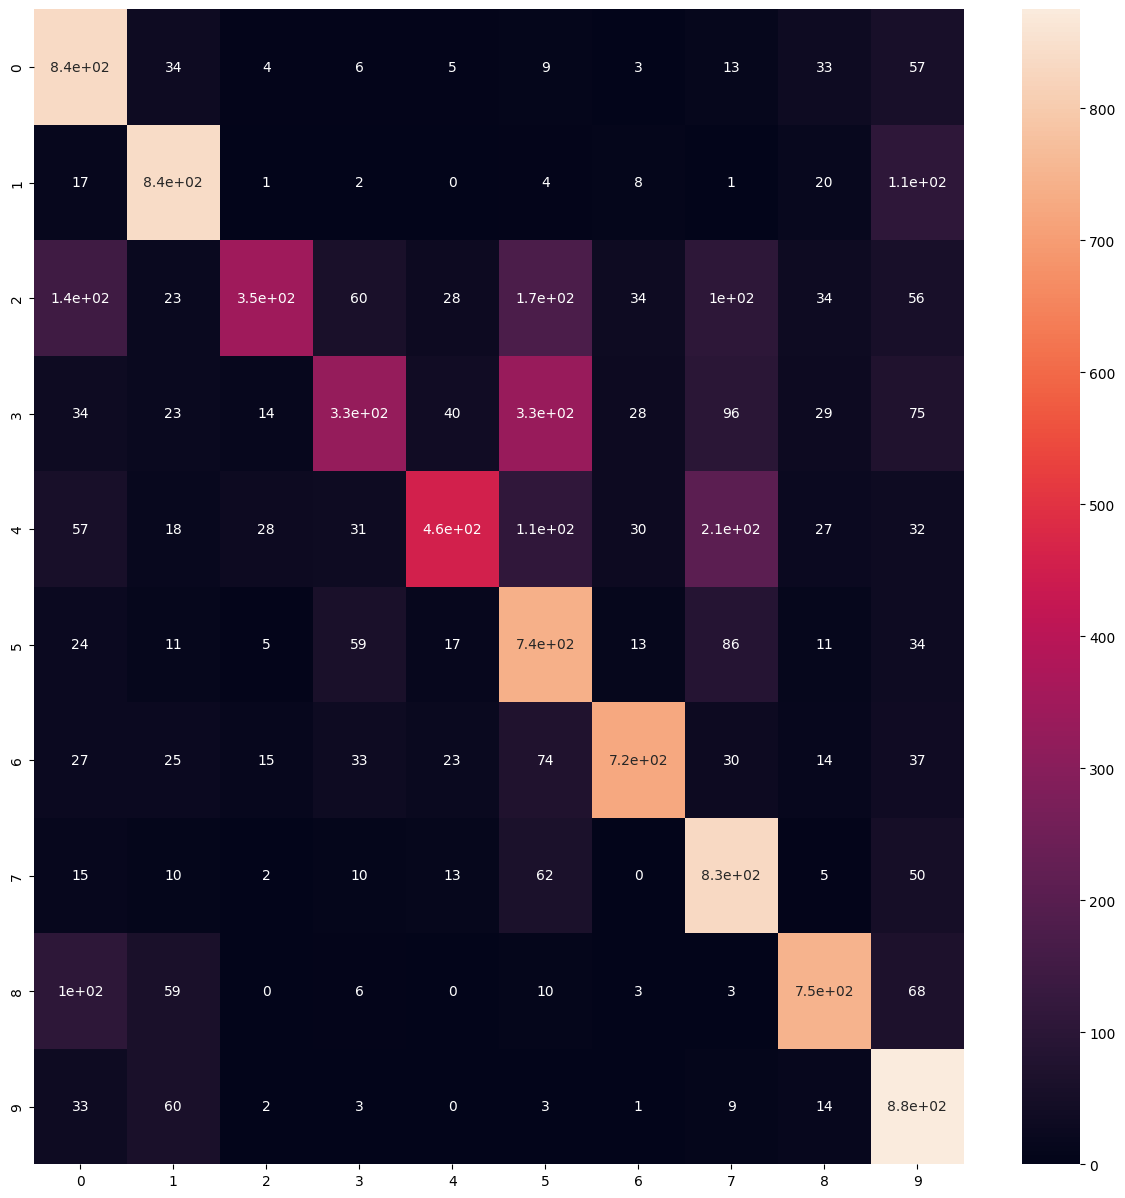

In [245]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (15, 15))
sns.heatmap(cm, annot = True);

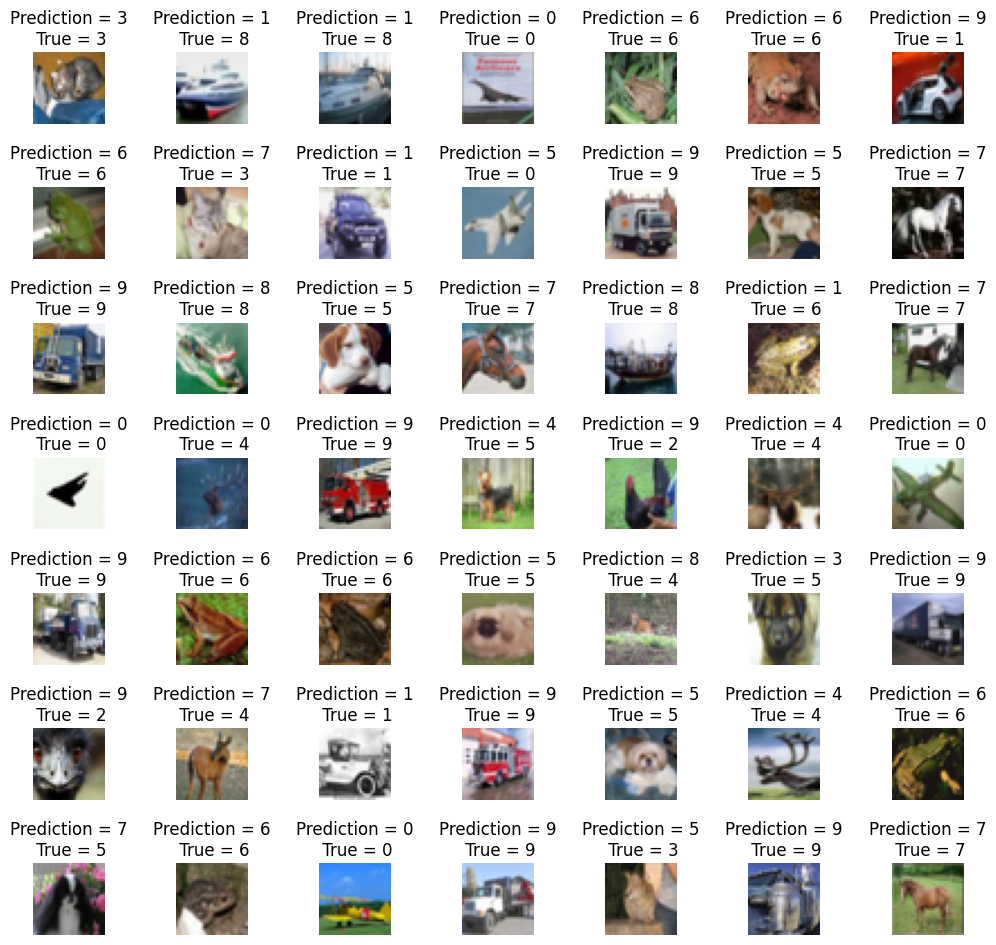

In [249]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i][0]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [250]:
for i in range(10):
  print(cm[i][i] / cm[i].sum())

0.836
0.838
0.346
0.328
0.458
0.74
0.722
0.833
0.747
0.875


In [251]:
cm

array([[836,  34,   4,   6,   5,   9,   3,  13,  33,  57],
       [ 17, 838,   1,   2,   0,   4,   8,   1,  20, 109],
       [144,  23, 346,  60,  28, 171,  34, 104,  34,  56],
       [ 34,  23,  14, 328,  40, 333,  28,  96,  29,  75],
       [ 57,  18,  28,  31, 458, 112,  30, 207,  27,  32],
       [ 24,  11,   5,  59,  17, 740,  13,  86,  11,  34],
       [ 27,  25,  15,  33,  23,  74, 722,  30,  14,  37],
       [ 15,  10,   2,  10,  13,  62,   0, 833,   5,  50],
       [104,  59,   0,   6,   0,  10,   3,   3, 747,  68],
       [ 33,  60,   2,   3,   0,   3,   1,   9,  14, 875]])